These are personal notes on the Datacamp course 'Statistical Thinking in Python (Part 2)'. If you're interested consider doing a course at https://www.datacamp.com

# Statistical Thinking in Python (Part 2)

After completing Statistical Thinking in Python (Part 1), you have the probabilistic mindset and foundational hacker stats skills to dive into data sets and extract useful information from them. In this course, you will do just that, expanding and honing your hacker stats toolbox to perform the two key tasks in statistical inference, parameter estimation and hypothesis testing. You will work with real data sets as you learn, culminating with analysis of measurements of the beaks of the Darwin's famous finches. You will emerge from this course with new knowledge and lots of practice under your belt, ready to attack your own inference problems out in the world.

### Parameter estimation by optimization
When doing statistical inference, we speak the language of probability. A probability distribution that describes your data has parameters. So, a major goal of statistical inference is to estimate the values of these parameters, which allows us to concisely and unambiguously describe our data and draw conclusions from it. In this chapter, you will learn how to find the optimal parameters, those that best describe your data.

DATASETS

* [Anscombe data](https://assets.datacamp.com/production/repositories/470/datasets/fe820c6cbe9bcf4060eeb9e31dd86aa04264153a/anscombe.csv)
* [Bee sperm counts](https://assets.datacamp.com/production/repositories/470/datasets/e427679d28d154934a6c087b2fa945bc7696db6d/bee_sperm.csv)
* [Female literacy and fertility](https://assets.datacamp.com/production/repositories/470/datasets/f1e7f8a98c18da5c60b625cb8af04c3217f4a5c3/female_literacy_fertility.csv)
* [Finch beaks (1975)](https://assets.datacamp.com/production/repositories/470/datasets/eb228490f7d823bfa6458b93db075ca5ccd3ec3d/finch_beaks_1975.csv)
* [Finch beaks (2012)](https://assets.datacamp.com/production/repositories/470/datasets/b28d5bf65e38460dca7b3c5c0e4d53bdfc1eb905/finch_beaks_2012.csv)
* [Fortis beak depth heredity](https://assets.datacamp.com/production/repositories/470/datasets/532cb2fecd1bffb006c79a28f344af2290d643f3/fortis_beak_depth_heredity.csv)
* [Frog tongue data](https://assets.datacamp.com/production/repositories/470/datasets/df6e0479c0f292ce9d2b951385f64df8e2a8e6ac/frog_tongue.csv)
* [Major League Baseball no-hitters](https://assets.datacamp.com/production/repositories/470/datasets/593c37a3588980e321b126e30873597620ca50b7/mlb_nohitters.csv)
* [Scandens beak depth heredity](https://assets.datacamp.com/production/repositories/470/datasets/7ff772e1f4e99ed93685296063b6e604a334236d/scandens_beak_depth_heredity.csv)
* [Sheffield Weather Station](https://assets.datacamp.com/production/repositories/470/datasets/129cba08c45749a82701fbe02180c5b69eb9adaf/sheffield_weather_station.csv)

## How often do we get no-hitters?

The number of games played between each no-hitter in the modern era (1901-2015) of Major League Baseball is stored in the array nohitter_times.

If you assume that no-hitters are described as a Poisson process, then the time between no-hitters is Exponentially distributed. As you have seen, the Exponential distribution has a single parameter, which we will call 
τ
, the typical interval time. The value of the parameter 
τ
 that makes the exponential distribution best match the data is the mean interval time (where time is in units of number of games) between no-hitters.

Compute the value of this parameter from the data. Then, use np.random.exponential() to "repeat" the history of Major League Baseball by drawing inter-no-hitter times from an exponential distribution with the 
τ
 you found and plot the histogram as an approximation to the PDF.

NumPy, pandas, matlotlib.pyplot, and seaborn have been imported for you as np, pd, plt, and sns, respectively.

### Instructions
* Seed the random number generator with 42.
* Compute the mean time (in units of number of games) between no-hitters.
* Draw 100,000 samples from an Exponential distribution with the parameter you computed from the mean of the inter-no-hitter times.
* Plot the theoretical PDF using plt.hist(). Remember to use keyword arguments bins=50, normed=True, and histtype='step'. Be sure to label your axes.
* Show your plot.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

nohitter_times = np.array([843,1613,1101,215,684,814,278,324,161,219,545,715,966,624
,29,450,107,20,91,1325,124,1468,104,1309,429,62,1878,1104
,123,251,93,188,983,166,96,702,23,524,26,299,59,39
,12,2,308,1114,813,887,645,2088,42,2090,11,886,1665,1084
,2900,2432,750,4021,1070,1765,1322,26,548,1525,77,2181,2752,127
,2147,211,41,1575,151,479,697,557,2267,542,392,73,603,233
,255,528,397,1529,1023,1194,462,583,37,943,996,480,1497,717
,224,219,1531,498,44,288,267,600,52,269,1086,386,176,2199
,216,54,675,1243,463,650,171,327,110,774,509,8,197,136
,12,1124,64,380,811,232,192,731,715,226,605,539,1491,323
,240,179,702,156,82,1397,354,778,603,1001,385,986,203,149
,576,445,180,1403,252,675,1351,2983,1568,45,899,3260,1025,31
,100,2055,4043,79,238,3931,2351,595,110,215,0,563,206,660
,242,577,179,157,192,192,1848,792,1693,55,388,225,1134,1172
,1555,31,1582,1044,378,1687,2915,280,765,2819,511,1521,745,2491
,580,2072,6450,578,745,1075,1103,1549,1520,138,1202,296,277,351
,391,950,459,62,1056,1128,139,420,87,71,814,603,1349,162
,1027,783,326,101,876,381,905,156,419,239,119,129,467])

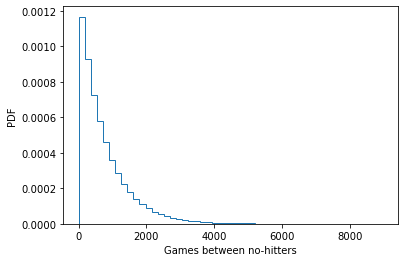

In [10]:
# Se# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time,
             bins=50, density=True, histtype='step') #here again I used 'density' instead of the old 'normed' prescribed in the course since matplotlib has newer releases which only work with the new 'density' parameter.
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

We see the typical shape of the Exponential distribution, going from a maximum at 0 and decaying to the right.

## Do the data follow our story?

You have modeled no-hitters using an Exponential distribution. Create an ECDF of the real data. Overlay the theoretical CDF with the ECDF from the data. This helps you to verify that the Exponential distribution describes the observed data.

It may be helpful to remind yourself of the function you created in the previous course to compute the ECDF, as well as the code you wrote to plot it.

### Instructions
* Compute an ECDF from the actual time between no-hitters (nohitter_times). Use the ecdf() function you wrote in the prequel course.
* Create a CDF from the theoretical samples you took in the last exercise (inter_nohitter_time).
* Plot x_theor and y_theor as a line using plt.plot(). Then overlay the ECDF of the real data x and y as points. To do this, you have to specify the keyword arguments marker = '.' and linestyle = 'none' in addition to x and y inside plt.plot().
* Set a 2% margin on the plot.
* Show the plot.

In [11]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

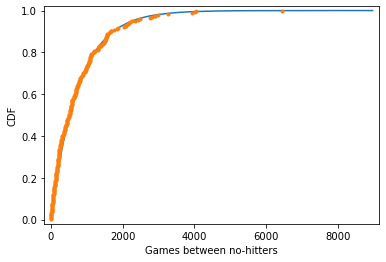

In [12]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()

It looks like no-hitters in the modern era of Major League Baseball are Exponentially distributed. Based on the story of the Exponential distribution, this suggests that they are a random process; when a no-hitter will happen is independent of when the last no-hitter was.

## How is this parameter optimal?

Now sample out of an exponential distribution with 
τ
 being twice as large as the optimal 
τ
. Do it again for 
τ
 half as large. Make CDFs of these samples and overlay them with your data. You can see that they do not reproduce the data as well. Thus, the 
τ
 you computed from the mean inter-no-hitter times is optimal in that it best reproduces the data.

Note: In this and all subsequent exercises, the random number generator is pre-seeded for you to save you some typing.

### Instructions
* Take 10000 samples out of an Exponential distribution with parameter 
τ
1
/
2
 = tau/2.
* Take 10000 samples out of an Exponential distribution with parameter 
τ
2
 = 2*tau.
* Generate CDFs from these two sets of samples using your ecdf() function.
* Add these two CDFs as lines to your plot. This has been done for you, so hit 'Submit Answer' to view the plot!

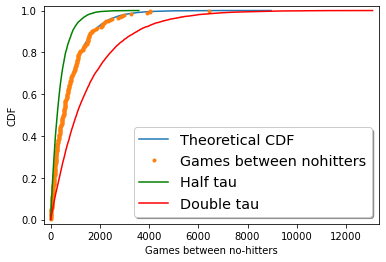

In [20]:
# Plot the theoretical CDFs
plt.plot(x_theor, y_theor, label='Theoretical CDF')
plt.plot(x, y, marker='.', linestyle='none', label='Games between nohitters')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2, size=10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(2*tau, size=10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half, color='green', label='Half tau')
_ = plt.plot(x_double, y_double, color='red', label='Double tau')

_ = plt.legend(loc='lower right', shadow=True, fontsize='x-large')

# Show the plot
plt.show()

Great work! Notice how the value of tau given by the mean matches the data best. In this way, tau is an optimal parameter.

## EDA of literacy/fertility data

In the next few exercises, we will look at the correlation between female literacy and fertility (defined as the average number of children born per woman) throughout the world. For ease of analysis and interpretation, we will work with the illiteracy rate.

It is always a good idea to do some EDA ahead of our analysis. To this end, plot the fertility versus illiteracy and compute the Pearson correlation coefficient. The Numpy array illiteracy has the illiteracy rate among females for most of the world's nations. The array fertility has the corresponding fertility data.

Here, it may be useful to refer back to the function you wrote in the previous course to compute the Pearson correlation coefficient.

### Instructions
* Plot fertility (y-axis) versus illiteracy (x-axis) as a scatter plot.
* Set a 2% margin.
* Compute and print the Pearson correlation coefficient between illiteracy and fertility.

In [23]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [26]:
illiteracy = np.array([9.5,49.2,1.,11.2,9.8,60.,50.2,51.2,0.6,1.,8.5,6.1,9.8,1.
,42.2,77.2,18.7,22.8,8.5,43.9,1.,1.,1.5,10.8,11.9,3.4,0.4,3.1
,6.6,33.7,40.4,2.3,17.2,0.7,36.1,1.,33.2,55.9,30.8,87.4,15.4,54.6
,5.1,1.1,10.2,19.8,0.,40.7,57.2,59.9,3.1,55.7,22.8,10.9,34.7,32.2
,43.,1.3,1.,0.5,78.4,34.2,84.9,29.1,31.3,18.3,81.8,39.,11.2,67.
,4.1,0.2,78.1,1.,7.1,1.,29.,1.1,11.7,73.6,33.9,14.,0.3,1.
,0.8,71.9,40.1,1.,2.1,3.8,16.5,4.1,0.5,44.4,46.3,18.7,6.5,36.8
,18.6,11.1,22.1,71.1,1.,0.,0.9,0.7,45.5,8.4,0.,3.8,8.5,2.
,1.,58.9,0.3,1.,14.,47.,4.1,2.2,7.2,0.3,1.5,50.5,1.3,0.6
,19.1,6.9,9.2,2.2,0.2,12.3,4.9,4.6,0.3,16.5,65.7,63.5,16.8,0.2
,1.8,9.6,15.2,14.4,3.3,10.6,61.3,10.9,32.2,9.3,11.6,20.7,6.5,6.7
,3.5,1.,1.6,20.5,1.5,16.7,2.,0.9])

fertility = np.array([1.769,2.682,2.077,2.132,1.827,3.872,2.288,5.173,1.393,1.262,2.156,3.026
,2.033,1.324,2.816,5.211,2.1,1.781,1.822,5.908,1.881,1.852,1.39,2.281
,2.505,1.224,1.361,1.468,2.404,5.52,4.058,2.223,4.859,1.267,2.342,1.579
,6.254,2.334,3.961,6.505,2.53,2.823,2.498,2.248,2.508,3.04,1.854,4.22
,5.1,4.967,1.325,4.514,3.173,2.308,4.62,4.541,5.637,1.926,1.747,2.294
,5.841,5.455,7.069,2.859,4.018,2.513,5.405,5.737,3.363,4.89,1.385,1.505
,6.081,1.784,1.378,1.45,1.841,1.37,2.612,5.329,5.33,3.371,1.281,1.871
,2.153,5.378,4.45,1.46,1.436,1.612,3.19,2.752,3.35,4.01,4.166,2.642
,2.977,3.415,2.295,3.019,2.683,5.165,1.849,1.836,2.518,2.43,4.528,1.263
,1.885,1.943,1.899,1.442,1.953,4.697,1.582,2.025,1.841,5.011,1.212,1.502
,2.516,1.367,2.089,4.388,1.854,1.748,2.978,2.152,2.362,1.988,1.426,3.29
,3.264,1.436,1.393,2.822,4.969,5.659,3.24,1.693,1.647,2.36,1.792,3.45
,1.516,2.233,2.563,5.283,3.885,0.966,2.373,2.663,1.251,2.052,3.371,2.093
,2.,3.883,3.852,3.718,1.732,3.928])

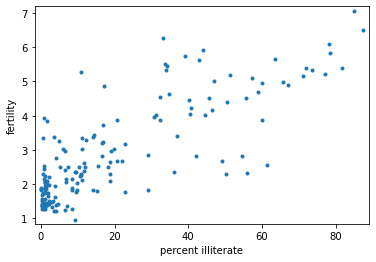

0.8041324026815341


In [27]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print(pearson_r(illiteracy, fertility))

You can see the correlation between illiteracy and fertility by eye, and by the substantial Pearson correlation coefficient of 0.8. It is difficult to resolve in the scatter plot, but there are many points around near-zero illiteracy and about 1.8 children/woman.

## Linear regression

We will assume that fertility is a linear function of the female illiteracy rate. That is, 
f =
a
i
+
b
, where 
a
 is the slope and 
b
 is the intercept. We can think of the intercept as the minimal fertility rate, probably somewhere between one and two. The slope tells us how the fertility rate varies with illiteracy. We can find the best fit line using np.polyfit().

Plot the data and the best fit line. Print out the slope and intercept. (Think: what are their units?)

### Instructions
* Compute the slope and intercept of the regression line using np.polyfit(). Remember, fertility is on the y-axis and illiteracy on the x-axis.
* Print out the slope and intercept from the linear regression.
* To plot the best fit line, create an array x that consists of 0 and 100 using np.array(). Then, compute the theoretical values of y based on your regression parameters. I.e., y = a * x + b.
* Plot the data and the regression line on the same plot. Be sure to label your axes.
* Hit 'Submit Answer' to display your plot.

slope = 0.04979854809063423 children per woman / percent illiterate
intercept = 1.888050610636557 children per woman


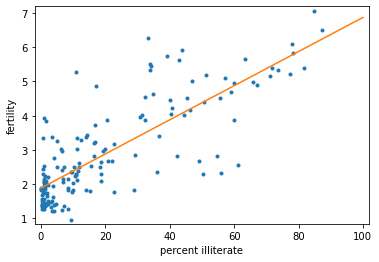

In [28]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility ,1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0,100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()

## How is it optimal?

The function np.polyfit() that you used to get your regression parameters finds the optimal slope and intercept. It is optimizing the sum of the squares of the residuals, also known as RSS (for residual sum of squares). In this exercise, you will plot the function that is being optimized, the RSS, versus the slope parameter a. To do this, fix the intercept to be what you found in the optimization. Then, plot the RSS vs. the slope. Where is it minimal?

### Instructions
* Specify the values of the slope to compute the RSS. Use np.linspace() to get 200 points in the range between 0 and 0.1. For example, to get 100 points in the range between 0 and 0.5, you could use np.linspace() like so: np.linspace(0, 0.5, 100).
* Initialize an array, rss, to contain the RSS using np.empty_like() and the array you created above. The empty_like() function returns a new array with the same shape and type as a given array (in this case, a_vals).
* Write a for loop to compute the sum of RSS of the slope. Hint: the RSS is given by np.sum((y_data - a * x_data - b) ** 2). The variable b you computed in the last exercise is already in your namespace. Here, fertility is the y_data and illiteracy the x_data.
* Plot the RSS (rss) versus slope (a_vals).
* Hit 'Submit Answer' to see the plot!

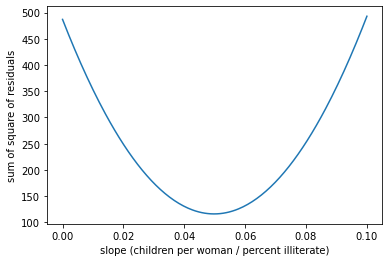

In [29]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(0, 0.1, 200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a*illiteracy - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()

Notice that the minimum on the plot, that is the value of the slope that gives the minimum sum of the square of the residuals, is the same value you got when performing the regression.

## The importance of EDA: Anscombe's quartet
In 1973, statistician Francis Anscombe published a paper that contained for fictitious x-y data sets, plotted below.
He uses these data sets to make an important point.
The point becomes clear if we blindly go about doing parameter estimation on these data sets.
Lets look at the mean x & y values of the four data sets.

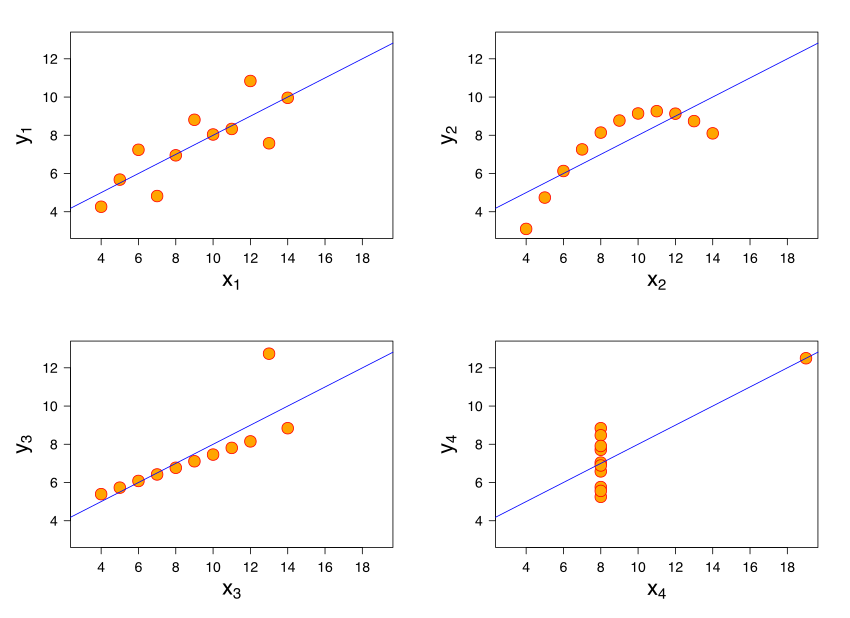

They're all the same

What if we do a linear regression on each of the data sets?
They're the same

Some of the fits are less optimal than others
Let's look at the sum of the squares of the residuals.
They're basically all the same

The data sets were constructed so this would happen.
He was making a very important point.
There are already some powerful tools for statistical inference.
You can compute summary statistics and optimal parameters, including linear regression parameters, and by the end of the course, you'll be able to construct confidence intervals which quantify uncertainty about the parameter estimates.
These are crucial skills for any data analyst, no doubt

### Look before you leap!
This is a powerful reminder to do some graphical exploratory data analysis before you start computing and making judgments about your data.

### Anscombe's quartet
For example, plot[0, 0] (x_0, y_0) might be well modeled with a line, and the regression parameters will be meaningful.
The same is true of plot[1, 0] (x_2, y_2), but the outlier throws off the slope and intercept. After doing EDA, you should look into what is causing that outlier
Plot[1, 1] (x_3, y_3) might also have a linear relationship between x, and y, but from the plot, you can conclude that you should try to acquire more data for intermediate x values to make sure that it does.
Plot[0, 1] (x_1, y_1) is definitely not linear, and you need to choose another model.

> Explore your data first! Always do EDA as you jump into a data set.

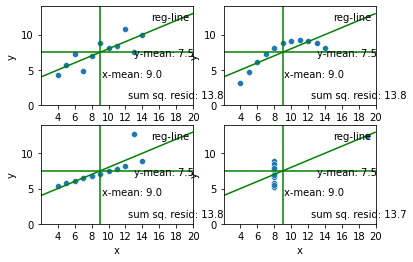

In [37]:
from matplotlib import collections as mc
anscombe = 'https://assets.datacamp.com/production/repositories/470/datasets/fe820c6cbe9bcf4060eeb9e31dd86aa04264153a/anscombe.csv'
anscombe = pd.read_csv(anscombe, header=[0, 1])
anscombe.columns = [f'{x[1]}_{x[0]}' for x in anscombe.columns]  # reduce multi-level column name to single level

def anscombe_plot():
    for i in range(1, 5):
        plt.subplot(2, 2, i)
        g = sns.scatterplot(x=f'x_{i-1}', y=f'y_{i-1}', data=anscombe)

        # x & y mean
        x_mean = anscombe.loc[:, f'x_{i-1}'].mean()
        y_mean = anscombe.loc[:, f'y_{i-1}'].mean()
        plt.vlines(anscombe.loc[:, f'x_{i-1}'].mean(), 0, 14, color='g')
        plt.text(9.2, 4, f'x-mean: {x_mean}')
        plt.hlines(anscombe.loc[:, f'y_{i-1}'].mean(), 2, 20, color='g')
        plt.text(13, 6.9, f'y-mean: {y_mean:0.1f}')

        # regression line
        slope, intercept = np.polyfit(anscombe[f'x_{i-1}'], anscombe[f'y_{i-1}'], 1)
        y1 = slope*2 + intercept
        y2 = slope*20 + intercept
        lc = mc.LineCollection([[(2, y1), (20, y2)]], color='green')
        g.add_collection(lc)
        plt.text(15, 12, 'reg-line')

        # sum of the squares of the residuals
        A = np.vstack((anscombe.loc[:, f'x_{i-1}'], np.ones(11))).T
        resid = np.linalg.lstsq(A, anscombe.loc[:, f'y_{i-1}'], rcond=-1)[1][0]
        plt.text(12.3, 1, f'sum sq. resid: {resid:0.1f}')

        plt.ylim(0, 14)
        plt.xlim(2, 20)
        plt.xticks(list(range(4, 22, 2)))
        plt.ylabel('y')
        plt.xlabel('x')
    return plt.show()
anscombe_plot()
    

## Linear regression on appropriate Anscombe data

For practice, perform a linear regression on the data set from Anscombe's quartet that is most reasonably interpreted with linear regression.

### Instructions
* Compute the parameters for the slope and intercept using np.polyfit(). The Anscombe data are stored in the arrays x and y.
* Print the slope a and intercept b.
* Generate theoretical 
x
 and 
y
 data from the linear regression. Your 
x
 array, which you can create with np.array(), should consist of 3 and 15. To generate the 
y
data, multiply the slope by x_theor and add the intercept.
* Plot the Anscombe data as a scatter plot and then plot the theoretical line. Remember to include the marker='.' and linestyle='none' keyword arguments in addition to x and y when to plot the Anscombe data as a scatter plot. You do not need these arguments when plotting the theoretical line.
* Hit 'Submit Answer' to see the plot!

0.5000909090909095 3.0000909090909076


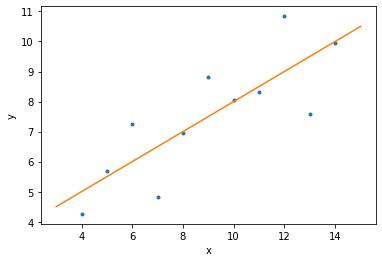

In [40]:
x = np.array([10.,8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.])
y = np.array([ 8.04,  6.95,  7.58,  8.81,  8.33,  9.96,  7.24,  4.26, 10.84,  4.82,  5.68])

# Perform linear regression: a, b
a, b = np.polyfit(x,y, 1)

# Print the slope and intercept
print(a, b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# Plot the Anscombe data and theoretical line
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.plot(x_theor, y_theor)

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

## Linear regression on all Anscombe data

Now, to verify that all four of the Anscombe data sets have the same slope and intercept from a linear regression, you will compute the slope and intercept for each set. The data are stored in lists; anscombe_x = [x1, x2, x3, x4] and anscombe_y = [y1, y2, y3, y4], where, for example, x2 and y2 are the 
x
 and 
y
 values for the second Anscombe data set.

### Instructions
* Write a for loop to do the following for each Anscombe data set.
* Compute the slope and intercept.
* Print the slope and intercept.

In [44]:
anscombe_x = [[10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.], [10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.],[10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.],[ 8.,  8.,  8.,  8.,  8.,  8.,  8., 19.,  8.,  8.,  8.]]
anscombe_y = [[ 8.04,  6.95,  7.58,  8.81,  8.33,  9.96,  7.24,  4.26, 10.84,4.82,  5.68],[9.14, 8.14, 8.74, 8.77, 9.26, 8.1 , 6.13, 3.1 , 9.13, 7.26, 4.74],[ 7.46,  6.77, 12.74,  7.11,  7.81,  8.84,  6.08,  5.39,  8.15,6.42,  5.73],[ 6.58,  5.76,  7.71,  8.84,  8.47,  7.04,  5.25, 12.5 ,  5.56,7.91,  6.89]]

# Iterate through x,y pairs
for x, y in zip(anscombe_x, anscombe_y):
    # Compute the slope and intercept: a, b
    a, b = np.polyfit(x, y, 1)

    # Print the result
    print('slope:', a, 'intercept:', b)

slope: 0.5000909090909095 intercept: 3.0000909090909076
slope: 0.5000000000000004 intercept: 3.000909090909089
slope: 0.4997272727272731 intercept: 3.0024545454545453
slope: 0.49990909090909064 intercept: 3.0017272727272735


## Getting the terminology down
Getting tripped up over terminology is a common cause of frustration in students. Unfortunately, you often will read and hear other data scientists using different terminology for bootstrap samples and replicates. This is even more reason why we need everything to be clear and consistent for this course. So, before going forward discussing bootstrapping, let's get our terminology down. If we have a data set with 
n
 repeated measurements, a bootstrap sample is an array of length 
n
 that was drawn from the original data with replacement. What is a bootstrap replicate?


### Answer the question
Possible Answers
* Just another name for a bootstrap sample.
* **A single value of a statistic computed from a bootstrap sample.**
* An actual repeat of the measurements

## Bootstrapping by hand

To help you gain intuition about how bootstrapping works, imagine you have a data set that has only three points, [-1, 0, 1]. How many unique bootstrap samples can be drawn (e.g., [-1, 0, 1] and [1, 0, -1] are unique), and what is the maximum mean you can get from a bootstrap sample? It might be useful to jot down the samples on a piece of paper.

(These are too few data to get meaningful results from bootstrap procedures, but this example is useful for intuition.)

### Instructions
Possible Answers
* There are 3 unique samples, and the maximum mean is 0.
* There are 10 unique samples, and the maximum mean is 0.
* There are 10 unique samples, and the maximum mean is 1.
* There are 27 unique samples, and the maximum mean is 0.
* **There are 27 unique samples, and the maximum mean is 1.**

There are 27 total bootstrap samples, and one of them, [1,1,1] has a mean of 1. Conversely, 7 of them have a mean of zero.

## Visualizing bootstrap samples

In this exercise, you will generate bootstrap samples from the set of annual rainfall data measured at the Sheffield Weather Station in the UK from 1883 to 2015. The data are stored in the NumPy array rainfall in units of millimeters (mm). By graphically displaying the bootstrap samples with an ECDF, you can get a feel for how bootstrap sampling allows probabilistic descriptions of data.

### Instructions
* Write a for loop to acquire 50 bootstrap samples of the rainfall data and plot their ECDF.
  * Use np.random.choice() to generate a bootstrap sample from the NumPy array rainfall. Be sure that the size of the resampled array is len(rainfall).
  * Use the function ecdf() that you wrote in the prequel to this course to generate the x and y values for the ECDF of the bootstrap sample bs_sample.
  * Plot the ECDF values. Specify color='gray' (to make gray dots) and alpha=0.1 (to make them semi-transparent, since we are overlaying so many) in addition to the marker='.' and linestyle='none' keyword arguments.
* Use ecdf() to generate x and y values for the ECDF of the original rainfall data available in the array rainfall.
* Plot the ECDF values of the original data.
* Hit 'Submit Answer' to visualize the samples!

In [52]:
rainfall = np.array([875.5,648.2,788.1,940.3,491.1,743.5,730.1,686.5,878.8,865.6
,654.9,831.5,798.1,681.8,743.8,689.1,752.1,837.2,710.6,749.2
,967.1,701.2,619.,747.6,803.4,645.6,804.1,787.4,646.8,997.1
,774.,734.5,835.,840.7,659.6,828.3,909.7,856.9,578.3,904.2
,883.9,740.1,773.9,741.4,866.8,871.1,712.5,919.2,927.9,809.4
,633.8,626.8,871.3,774.3,898.8,789.6,936.3,765.4,882.1,681.1
,661.3,847.9,683.9,985.7,771.1,736.6,713.2,774.5,937.7,694.5
,598.2,983.8,700.2,901.3,733.5,964.4,609.3,1035.2,718.,688.6
,736.8,643.3,1038.5,969.,802.7,876.6,944.7,786.6,770.4,808.6
,761.3,774.2,559.3,674.2,883.6,823.9,960.4,877.8,940.6,831.8
,906.2,866.5,674.1,998.1,789.3,915.,737.1,763.,666.7,824.5
,913.8,905.1,667.8,747.4,784.7,925.4,880.2,1086.9,764.4,1050.1
,595.2,855.2,726.9,785.2,948.8,970.6,896.,618.4,572.4,1146.4
,728.2,864.2,793.])

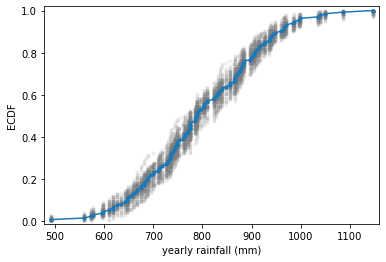

In [53]:
for i in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

Notice how the bootstrap samples give an idea of how the distribution of rainfalls is spread.

## Generating many bootstrap replicates

The function bootstrap_replicate_1d() from the video is available in your namespace. Now you'll write another function, draw_bs_reps(data, func, size=1), which generates many bootstrap replicates from the data set. This function will come in handy for you again and again as you compute confidence intervals and later when you do hypothesis tests.

For your reference, the bootstrap_replicate_1d() function is provided below:

In [54]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

### Instructions
* Define a function with call signature draw_bs_reps(data, func, size=1).
* Using np.empty(), initialize an array called bs_replicates of size size to hold all of the bootstrap replicates.
* Write a for loop that ranges over size and computes a replicate using bootstrap_replicate_1d(). Refer to the exercise description above to see the function signature of bootstrap_replicate_1d(). Store the replicate in the appropriate index of bs_replicates.
* Return the array of replicates bs_replicates. This has already been done for you.

In [85]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

## Bootstrap replicates of the mean and the SEM

In this exercise, you will compute a bootstrap estimate of the probability density function of the mean annual rainfall at the Sheffield Weather Station. Remember, we are estimating the mean annual rainfall we would get if the Sheffield Weather Station could repeat all of the measurements from 1883 to 2015 over and over again. This is a probabilistic estimate of the mean. You will plot the PDF as a histogram, and you will see that it is Normal.

In fact, it can be shown theoretically that under not-too-restrictive conditions, the value of the mean will always be Normally distributed. (This does not hold in general, just for the mean and a few other statistics.) The standard deviation of this distribution, called the standard error of the mean, or SEM, is given by the standard deviation of the data divided by the square root of the number of data points. I.e., for a data set, sem = np.std(data) / np.sqrt(len(data)). Using hacker statistics, you get this same result without the need to derive it, but you will verify this result from your bootstrap replicates.

The dataset has been pre-loaded for you into an array called rainfall.

### Instructions
* Draw 10000 bootstrap replicates of the mean annual rainfall using your draw_bs_reps() function and the rainfall array. Hint: Pass in np.mean for func to compute the mean.
  * As a reminder, draw_bs_reps() accepts 3 arguments: data, func, and size.
* Compute and print the standard error of the mean of rainfall.
  * The formula to compute this is np.std(data) / np.sqrt(len(data)).
* Compute and print the standard deviation of your bootstrap replicates bs_replicates.
* Make a histogram of the replicates using the normed=True keyword argument and 50 bins.
* Hit 'Submit Answer' to see the plot!

10.510549150506188
10.558783094499416


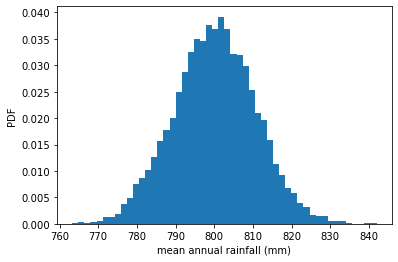

In [87]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.mean, 10000)

# Compute and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

Notice that the SEM we got from the known expression and the bootstrap replicates is the same and the distribution of the bootstrap replicates of the mean is Normal.

## Confidence intervals of rainfall data

A confidence interval gives upper and lower bounds on the range of parameter values you might expect to get if we repeat our measurements. For named distributions, you can compute them analytically or look them up, but one of the many beautiful properties of the bootstrap method is that you can take percentiles of your bootstrap replicates to get your confidence interval. Conveniently, you can use the np.percentile() function.

Use the bootstrap replicates you just generated to compute the 95% confidence interval. That is, give the 2.5th and 97.5th percentile of your bootstrap replicates stored as bs_replicates. What is the 95% confidence interval?

### Instructions
Possible Answers
* (765, 776) mm/year
* **(780, 821) mm/year**
* (761, 817) mm/year
* (761, 841) mm/year

In [88]:
np.percentile(bs_replicates, [2.5, 97.5])

array([779.38492481, 820.82287594])

See, it's simple to get confidence intervals using bootstrap!

## Bootstrap replicates of other statistics

We saw in a previous exercise that the mean is Normally distributed. This does not necessarily hold for other statistics, but no worry: as hackers, we can always take bootstrap replicates! In this exercise, you'll generate bootstrap replicates for the variance of the annual rainfall at the Sheffield Weather Station and plot the histogram of the replicates.

Here, you will make use of the draw_bs_reps() function you defined a few exercises ago. It is provided below for your reference:

In [89]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    # Initialize array of replicates
    bs_replicates = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates

### Instructions
* Draw 10000 bootstrap replicates of the variance in annual rainfall, stored in the rainfall dataset, using your draw_bs_reps() function. Hint: Pass in np.var for computing the variance.
* Divide your variance replicates (bs_replicates) by 100 to put the variance in units of square centimeters for convenience.
* Make a histogram of bs_replicates using the normed=True keyword argument and 50 bins.

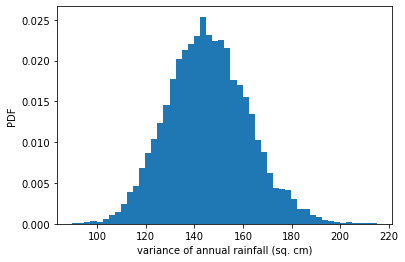

In [90]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.var, 10000)

# Put the variance in units of square centimeters
bs_replicates = bs_replicates/100

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

This is not normally distributed, as it has a longer tail to the right. Note that you can also compute a confidence interval on the variance, or any other statistic, using np.percentile() with your bootstrap replicates.

## Confidence interval on the rate of no-hitters

Consider again the inter-no-hitter intervals for the modern era of baseball. Generate 10,000 bootstrap replicates of the optimal parameter 

τ
. Plot a histogram of your replicates and report a 95% confidence interval.

### Instructions
* Generate 10000 bootstrap replicates of 
τ
 from the nohitter_times data using your draw_bs_reps() function. Recall that the optimal 
τ
 is calculated as the mean of the data.
* Compute the 95% confidence interval using np.percentile() and passing in two arguments: The array bs_replicates, and the list of percentiles - in this case 2.5 and 97.5.
* Print the confidence interval.
* Plot a histogram of your bootstrap replicates. This has been done for you, so hit 'Submit Answer' to see the plot!

95% confidence interval = [664.82858566 871.52211155] games


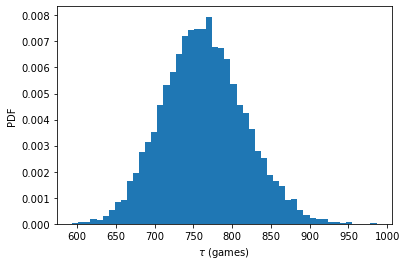

In [92]:
# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times, np.mean, 10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

This gives you an estimate of what the typical time between no-hitters is. It could be anywhere between 660 and 870 games.

## A function to do pairs bootstrap

As discussed in the video, pairs bootstrap involves resampling pairs of data. Each collection of pairs fit with a line, in this case using np.polyfit(). We do this again and again, getting bootstrap replicates of the parameter values. To have a useful tool for doing pairs bootstrap, you will write a function to perform pairs bootstrap on a set of x,y data.

### Instructions
* Define a function with call signature draw_bs_pairs_linreg(x, y, size=1) to perform pairs bootstrap estimates on linear regression parameters.
* Use np.arange() to set up an array of indices going from 0 to len(x). These are what you will resample and use them to pick values out of the x and y arrays.
* Use np.empty() to initialize the slope and intercept replicate arrays to be of size size.
* Write a for loop to:
  * Resample the indices inds. Use np.random.choice() to do this.
  * Make new 
x
 and 
y
 arrays bs_x and bs_y using the the resampled indices bs_inds. To do this, slice x and y with bs_inds.
  * Use np.polyfit() on the new 
x
 and 
y
 arrays and store the computed slope and intercept.
* Return the pair bootstrap replicates of the slope and intercept.

In [93]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(0, len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

## Pairs bootstrap of literacy/fertility data

Using the function you just wrote, perform pairs bootstrap to plot a histogram describing the estimate of the slope from the illiteracy/fertility data. Also report the 95% confidence interval of the slope. The data is available to you in the NumPy arrays illiteracy and fertility.

As a reminder, draw_bs_pairs_linreg() has a function signature of draw_bs_pairs_linreg(x, y, size=1), and it returns two values: bs_slope_reps and bs_intercept_reps.

### Instructions
* Use your draw_bs_pairs_linreg() function to take 1000 bootstrap replicates of the slope and intercept. The x-axis data is illiteracy and y-axis data is fertility.
* Compute and print the 95% bootstrap confidence interval for the slope.
* Plot and show a histogram of the slope replicates. Be sure to label your axes. This has been done for you, so click 'Submit Answer' to see your histogram!

[0.04392375 0.05518516]


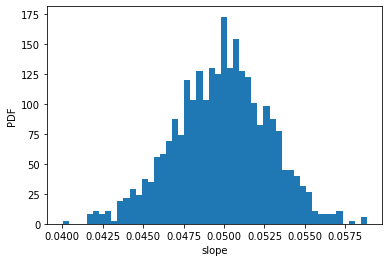

In [95]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility, 1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, density=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

## Plotting bootstrap regressions

A nice way to visualize the variability we might expect in a linear regression is to plot the line you would get from each bootstrap replicate of the slope and intercept. Do this for the first 100 of your bootstrap replicates of the slope and intercept (stored as bs_slope_reps and bs_intercept_reps).

### Instructions
* Generate an array of 
x
-values consisting of 0 and 100 for the plot of the regression lines. Use the np.array() function for this.
* Write a for loop in which you plot a regression line with a slope and intercept given by the pairs bootstrap replicates. Do this for 100 lines.
  * When plotting the regression lines in each iteration of the for loop, recall the regression equation y = a*x + b. Here, a is bs_slope_reps[i] and b is bs_intercept_reps[i].
  * Specify the keyword arguments linewidth=0.5, alpha=0.2, and color='red' in your call to plt.plot().
* Make a scatter plot with illiteracy on the x-axis and fertility on the y-axis. Remember to specify the marker='.' and linestyle='none' keyword arguments.
* Label the axes, set a 2% margin, and show the plot. This has been done for you, so hit 'Submit Answer' to visualize the bootstrap regressions!

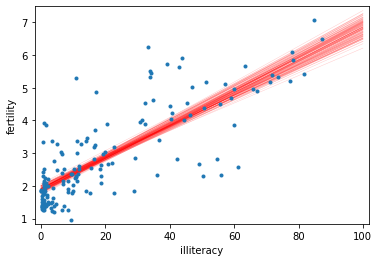

In [96]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0, 100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, 
                 bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

Great work! You now have some serious chops for parameter estimation. Let's move on to hypothesis testing!

## Introduction to hypothesis testing
You now know how to define and estimate parameters given a model. But the question remains: how reasonable is it to observe your data if a model is true? This question is addressed by hypothesis tests. They are the icing on the inference cake. After completing this chapter, you will be able to carefully construct and test hypotheses using hacker statistics.

### Formulating and simulating a hypothesis
When we studied linear regression, we assumed a linear model for how the data are generated and then estimated the parameters that are defined by that model.
But, how do we assess how reasonable it is that our observed data are actually described by the model?
This is the realm of hypothesis testing.
Let's start by thinking about a simpler scenario.

### Consider the following
Ohio and Pennsylvania are similar states.
They're neighbors and they both have liberal urban counties and also lots of rural conservative counties.
I hypothesize that country-level voting in these two states have identical probability distributions.
We have voting data to help test this hypothesis.
Stated more concretely, we're going to assess how reasonable the observed data are assuming the hypothesis is true.

### Null hypothesis
The hypothesis we are testing is typically called the null hypothesis.
We might start by just plotting the two ECDFs of county-level votes.
Based on the graph below, it's pretty tough to make a judgment.
Pennsylvania seems to be slightly more toward Obama in the middle part of the ECDFs, but not by much.
We can't really draw a conclusion here.
We could just compare some summary statistics.
An answer is still not clear.
The means and medians of the two states are really close, and the standard deviations are almost identical.
Eyeballing the data is not enough to make a determination.
To resolve this issue, we can simulate what the data would look like if the country-level voting trends in the two states were identically distributed.
We can do this by putting the Democratic share of the vote for all of Pennsylvania's 67 counties and Ohio's 88 counties together.
We then ignore what state they belong to.
Next, randomly scramble the ordering of the counties.
We then re-label the first 67 to be Pennsylvania and the remaining to be Ohio.
We we just redid the election as if there was no difference between Pennsylvania and Ohio.


### Permutation
This technique, of scrambling the order of an array, is called permutation.
It is at the heart of simulating a null hypothesis were we assume two quantities are identically distributed.


## Generating a permutation sample

In the video, you learned that permutation sampling is a great way to simulate the hypothesis that two variables have identical probability distributions. This is often a hypothesis you want to test, so in this exercise, you will write a function to generate a permutation sample from two data sets.

Remember, a permutation sample of two arrays having respectively n1 and n2 entries is constructed by concatenating the arrays together, scrambling the contents of the concatenated array, and then taking the first n1 entries as the permutation sample of the first array and the last n2 entries as the permutation sample of the second array.

### Instructions
* Concatenate the two input arrays into one using np.concatenate(). Be sure to pass in data1 and data2 as one argument (data1, data2).
* Use np.random.permutation() to permute the concatenated array.
* Store the first len(data1) entries of permuted_data as perm_sample_1 and the last len(data2) entries of permuted_data as perm_sample_2. In practice, this can be achieved by using :len(data1) and len(data1): to slice permuted_data.
* Return perm_sample_1 and perm_sample_2.

In [97]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

## Visualizing permutation sampling

To help see how permutation sampling works, in this exercise you will generate permutation samples and look at them graphically.

We will use the Sheffield Weather Station data again, this time considering the monthly rainfall in June (a dry month) and November (a wet month). We expect these might be differently distributed, so we will take permutation samples to see how their ECDFs would look if they were identically distributed.

The data are stored in the Numpy arrays rain_june and rain_november.

As a reminder, permutation_sample() has a function signature of permutation_sample(data_1, data_2) with a return value of permuted_data[:len(data_1)], permuted_data[len(data_1):], where permuted_data = np.random.permutation(np.concatenate((data_1, data_2))).

### Instructions
* Write a for loop to generate 50 permutation samples, compute their ECDFs, and plot them.
  * Generate a permutation sample pair from rain_june and rain_november using your permutation_sample() function.
  * Generate the x and y values for an ECDF for each of the two permutation samples for the ECDF using your ecdf() function.
  * Plot the ECDF of the first permutation sample (x_1 and y_1) as dots. Do the same for the second permutation sample (x_2 and y_2).
* Generate x and y values for ECDFs for the rain_june and rain_november data and plot the ECDFs using respectively the keyword arguments color='red' and color='blue'.
* Label your axes, set a 2% margin, and show your plot. This has been done for you, so just hit 'Submit Answer' to view the plot!

In [100]:
rain_june = np.array([66.2,39.7,76.4,26.5,11.2,61.8,6.1,48.4,89.2,104.,34.,60.6
,57.1,79.1,90.9,32.3,63.8,78.2,27.5,43.4,30.1,17.3,77.5,44.9
,92.2,39.6,79.4,66.1,53.5,98.5,20.8,55.5,39.6,56.,65.1,14.8
,13.2,88.1,8.4,32.1,19.6,40.4,2.2,77.5,105.4,77.2,38.,27.1
,111.8,17.2,26.7,23.3,77.2,87.2,27.7,50.6,60.3,15.1,6.,29.4
,39.3,56.3,80.4,85.3,68.4,72.5,13.3,28.4,14.7,37.4,49.5,57.2
,85.9,82.1,31.8,126.6,30.7,41.4,33.9,13.5,99.1,70.2,91.8,61.3
,13.7,54.9,62.5,24.2,69.4,83.1,44.,48.5,11.9,16.6,66.4,90.
,34.9,132.8,33.4,225.,7.6,40.9,76.5,48.,140.,55.9,54.1,46.4
,68.6,52.2,108.3,14.6,11.3,29.8,130.9,152.4,61.,46.6,43.9,30.9
,111.1,68.5,42.2,9.8,285.6,56.7,168.2,41.2,47.8,166.6,37.8,45.4
,43.2])
rain_november = np.array([83.6,30.9,62.2,37.,41.,160.2,18.2,122.4,71.3,44.2,49.1,37.6
,114.5,28.8,82.5,71.9,50.7,67.7,112.,63.6,42.8,57.2,99.1,86.4
,84.4,38.1,17.7,102.2,101.3,58.,82.,101.4,81.4,100.1,54.6,39.6
,57.5,29.2,48.8,37.3,115.4,55.6,62.,95.,84.2,118.1,153.2,83.4
,104.7,59.,46.4,50.,147.6,76.8,59.9,101.8,136.6,173.,92.5,37.
,59.8,142.1,9.9,158.2,72.6,28.,112.9,119.3,199.2,50.7,44.,170.7
,67.2,21.4,61.3,15.6,106.,116.2,42.3,38.5,132.5,40.8,147.5,93.9
,71.4,87.3,163.7,141.4,62.6,84.9,28.8,121.1,28.6,32.4,112.,50.
,96.9,81.8,70.4,117.5,41.2,124.9,78.2,93.,53.5,50.5,42.6,47.9
,73.1,129.1,56.9,103.3,60.5,134.3,93.1,49.5,48.2,167.9,27.,111.1
,55.4,36.2,57.4,66.8,58.3,60.,161.6,112.7,37.4,110.6,56.6,95.8
,126.8])

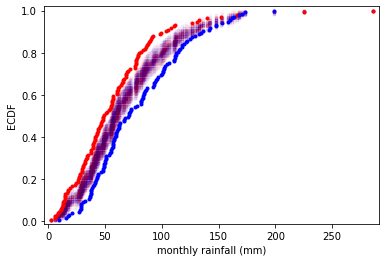

In [101]:
for i in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june, rain_november)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

Notice that the permutation samples ECDFs overlap and give a purple haze. None of the ECDFs from the permutation samples overlap with the observed data, suggesting that the hypothesis is not commensurate with the data. June and November rainfall are not identically distributed.

The most important thing to consider when performing a hypothesis tes is: What are you asking?

## What is a p-value?
The p-value is generally a measure of: the probability of observing a test statistic equally or more extreme than the one you observed, given that the null hypothesis is true.

As we are considering probability in hacker statistics, we cannot assign a probability to a hypothesis, only probability of observing data under a hypothesis.    
    

## Generating permutation replicates

As discussed in the video, a permutation replicate is a single value of a statistic computed from a permutation sample. As the draw_bs_reps() function you wrote in chapter 2 is useful for you to generate bootstrap replicates, it is useful to have a similar function, draw_perm_reps(), to generate permutation replicates. You will write this useful function in this exercise.

The function has call signature draw_perm_reps(data_1, data_2, func, size=1). Importantly, func must be a function that takes two arrays as arguments. In most circumstances, func will be a function you write yourself.

### Instructions
* Define a function with this signature: draw_perm_reps(data_1, data_2, func, size=1).
* Initialize an array to hold the permutation replicates using np.empty().
* Write a for loop to:
  * Compute a permutation sample using your permutation_sample() function
  * Pass the samples into func() to compute the replicate and store the result in your array of replicates.
* Return the array of replicates.

In [103]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

## Look before you leap: EDA before hypothesis testing

Kleinteich and Gorb (Sci. Rep., 4, 5225, 2014) performed an interesting experiment with South American horned frogs. They held a plate connected to a force transducer, along with a bait fly, in front of them. They then measured the impact force and adhesive force of the frog's tongue when it struck the target.

Frog A is an adult and Frog B is a juvenile. The researchers measured the impact force of 20 strikes for each frog. In the next exercise, we will test the hypothesis that the two frogs have the same distribution of impact forces. But, remember, it is important to do EDA first! Let's make a bee swarm plot for the data. They are stored in a Pandas data frame, df, where column ID is the identity of the frog and column impact_force is the impact force in Newtons (N).

### Instructions
* Use sns.swarmplot() to make a bee swarm plot of the data by specifying the x, y, and data keyword arguments.
* Label your axes.
* Show the plot.

In [104]:
frogs = pd.read_csv('/Users/hrozema1/Documents/GitHub/example-codes/datasets/frog_tongue.txt', header=[14])
frogs.date = pd.to_datetime(frogs.date, format='%Y_%m_%d')
frogs.head()

,date,ID,trial number,impact force (mN),impact time (ms),impact force / body weight,adhesive force (mN),time frog pulls on target (ms),adhesive force / body weight,adhesive impulse (N-s),total contact area (mm2),contact area without mucus (mm2),contact area with mucus / contact area without mucus,contact pressure (Pa),adhesive strength (Pa)
0,2013-02-26,I,3,1205,46,1.95,-785,884,1.27,-0.290,387,70,0.82,3117,-2030
1,2013-02-26,I,4,2527,44,4.08,-983,248,1.59,-0.181,101,94,0.07,24923,-9695
2,2013-03-01,I,1,1745,34,2.82,-850,211,1.37,-0.157,83,79,0.05,21020,-10239
3,2013-03-01,I,2,1556,41,2.51,-455,1025,0.74,-0.170,330,158,0.52,4718,-1381
4,2013-03-01,I,3,493,36,0.80,-974,499,1.57,-0.423,245,216,0.12,2012,-3975


### These data are from the paper:
Kleinteich and Gorb, Sci. Rep., 4, 5225, 2014.
It was featured in the New York Times.
 http://www.nytimes.com/2014/08/25/science/a-frog-thats-a-living-breathing-pac-man.html

The authors included the data in their supplemental information.

Importantly, the ID refers to the identifites of the frogs they tested.
*  I:   adult, 63 mm snout-vent-length (SVL) and 63.1 g body weight,
       Ceratophrys cranwelli crossed with Ceratophrys cornuta
*  II:  adult, 70 mm SVL and 72.7 g body weight,
       Ceratophrys cranwelli crossed with Ceratophrys cornuta
*  III: juvenile, 28 mm SVL and 12.7 g body weight, Ceratophrys cranwelli
*  IV:  juvenile, 31 mm SVL and 12.7 g body weight, Ceratophrys cranwelli

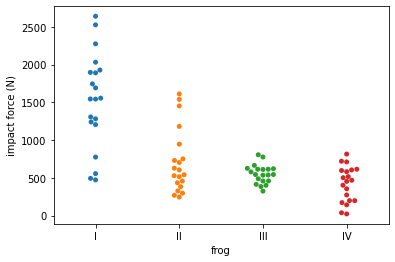

In [105]:
# Make bee swarm plot
_ = sns.swarmplot(x=frogs['ID'], y=frogs['impact force (mN)'], data=frogs)

# Label axes
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')

# Show the plot
plt.show()

In [107]:
print(frogs.shape)

(80, 15)


Eyeballing it, it does not look like they come from the same distribution. Frog I, the adult, has three or four very hard strikes, and Frog II, the strongest juvenile, has a couple weak ones as well as weaker juvenile frogs III and IV. However, it is possible that with only 80 samples it might be too difficult to tell if they have difference distributions, so we should proceed with the hypothesis test.

## Permutation test on frog data

The average strike force of Frog I was 0.71 Newtons (N), and that of Frog II was 0.42 N for a difference of 0.29 N. It is possible the frogs strike with the same force and this observed difference was by chance. You will compute the probability of getting at least a 0.29 N difference in mean strike force under the hypothesis that the distributions of strike forces for the two frogs are identical. We use a permutation test with a test statistic of the difference of means to test this hypothesis.

For your convenience, the data has been stored in the arrays force_a and force_b.

### Instructions
* Define a function with call signature diff_of_means(data_1, data_2) that returns the differences in means between two data sets, mean of data_1 minus mean of data_2.
* Use this function to compute the empirical difference of means that was observed in the frogs.
* Draw 10000 permutation replicates of the difference of means.
* Compute the p-value.
* Print the p-value.

In [116]:
force_a = frogs['impact force (mN)'][frogs.ID == 'II'].div(1000).to_list()
force_b = frogs['impact force (mN)'][frogs.ID == 'IV'].div(1000).to_list()

In [117]:
print('Mean force of frog a: ' + str(np.mean(force_a)))
print('Mean force of frog b: ' + str(np.mean(force_b)))

Mean force of frog a: 0.7073500000000001
Mean force of frog b: 0.4191000000000001


In [118]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.004


The p-value tells you that there is about a 0.4% chance that you would get the difference of means observed in the experiment if frogs were exactly the same. A p-value below 0.01 is typically said to be "statistically significant," but: warning! warning! warning! You have computed a p-value; it is a number. I encourage you not to distill it to a yes-or-no phrase. p = 0.004 and p = 0.000000004 are both said to be "statistically significant," but they are definitely not the same!